In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
HDFC = pd.read_csv('HDFC.csv')
HDFC.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFC,EQ,27-Mar-2019,1946.30,1955.55,1959.00,1906.00,1914.10,1919.90,1937.71,3076446,5.961253e+09,161822
1,HDFC,EQ,28-Mar-2019,1919.90,1917.00,1950.00,1912.05,1942.10,1944.45,1942.93,6370987,1.237836e+10,151893
2,HDFC,EQ,29-Mar-2019,1944.45,1950.05,1972.25,1936.05,1964.00,1968.25,1956.38,4320179,8.451925e+09,148642
3,HDFC,EQ,01-Apr-2019,1968.25,1968.10,1975.00,1945.05,1951.00,1959.65,1960.06,3328552,6.524154e+09,168073
4,HDFC,EQ,02-Apr-2019,1959.65,1966.10,2001.00,1955.00,1998.95,1995.95,1979.73,3655232,7.236387e+09,159005


In [3]:
HDFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 653 non-null    object 
 1   Series                 653 non-null    object 
 2   Date                   653 non-null    object 
 3   Prev Close             653 non-null    float64
 4   Open Price             653 non-null    float64
 5   High Price             653 non-null    float64
 6   Low Price              653 non-null    float64
 7   Last Price             653 non-null    float64
 8   Close Price            653 non-null    float64
 9   Average Price          653 non-null    float64
 10  Total Traded Quantity  653 non-null    int64  
 11  Turnover               653 non-null    float64
 12  No. of Trades          653 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 66.4+ KB


In [4]:
HDFC['Date'] = pd.to_datetime(HDFC['Date'])

In [5]:
print(f'Dataframe contains stock prices between {HDFC.Date.min()} {HDFC.Date.max()}') 
print(f'Total days = {(HDFC.Date.max()  - HDFC.Date.min()).days} days')

Dataframe contains stock prices between 2019-03-27 00:00:00 2021-03-25 00:00:00
Total days = 729 days


In [6]:
HDFC.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,6.530000e+02,6.530000e+02,653.000000
mean,1746.449311,1749.144564,1774.158882,1722.880245,1748.426187,1748.265391,1748.469923,3.515540e+06,7.197153e+09,128439.543645
std,721.506297,721.565921,726.737757,713.670852,720.174580,720.427805,720.050971,2.915155e+06,5.689994e+09,93630.610894
min,180.000000,295.000000,299.950000,295.000000,298.200000,298.200000,298.770000,2.400000e+03,7.776300e+05,1.000000
25%,1555.150000,1570.000000,1637.650000,1501.500000,1560.000000,1555.150000,1555.480000,1.544391e+06,3.447994e+09,65565.000000
50%,1974.600000,1977.400000,2001.000000,1951.250000,1976.450000,1977.050000,1980.190000,3.245630e+06,6.908951e+09,132455.000000
75%,2259.950000,2256.800000,2286.300000,2231.600000,2262.000000,2261.900000,2262.050000,5.026304e+06,1.036941e+10,185412.000000
max,2860.450000,2871.000000,2896.000000,2838.000000,2861.550000,2860.450000,2867.920000,1.820364e+07,3.710496e+10,538170.000000


<AxesSubplot:>

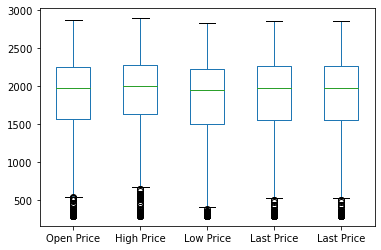

In [7]:
HDFC[['Open Price','High Price','Low Price','Last Price','Last Price']].plot(kind='box')

In [8]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of HDFC',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

HDFC_data = [{'x':HDFC['Date'], 'y':HDFC['Last Price']}]
plot = go.Figure(data=HDFC_data, layout=layout)

In [9]:
#plot(plot) #plotting offline
iplot(plot)

In [10]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets
X = np.array(HDFC.index).reshape(-1,1)
Y = HDFC['Last Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
HDFC_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=HDFC_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.1263891031196116	0.09104920242032655
MSE       465198.35585500946	438448.57869797776

